The main agenda is not to build the best model for this data but to learn about how to use regularization and apply the theory concepts I learn about ridge and lasso.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('auto-mpg.csv')

In [3]:
print(df.shape)
df.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Basic idea about data

In [4]:
# checking for any null value present in the dataset
# we are good to go as no null value we have.
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


- 'horsepower' column is object type so let's convert it into float.
      There is non numeric value ('?') present in 6 rows so because of less dirty row we can drop those rows.
      
- Also df.describe() indicate that feature scalling is required and attribute ranges differently for regression analysis.

In [6]:
# Basic information about data
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
# data preprocessing
df = df[df.horsepower!='?']
df.drop(columns='car name', axis=1, inplace=True )
df.horsepower = df.horsepower.astype(float)

Text(0.5, 1.0, 'distribution plot - mpg')


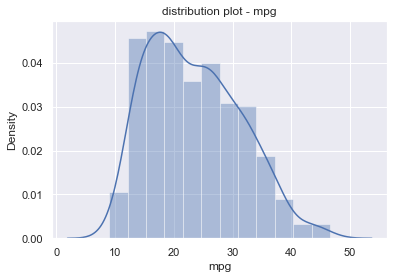

In [8]:
print(sns.distplot(df.mpg).set_title('distribution plot - mpg'))
# slightly right skewed distribution

Text(0.5, 1.0, 'cylinders counts')


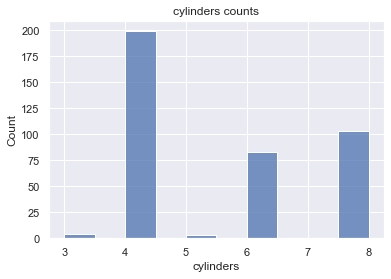

In [9]:
print(sns.histplot(df.cylinders).set_title('cylinders counts'))
# mejorly 4 cylinders in the data

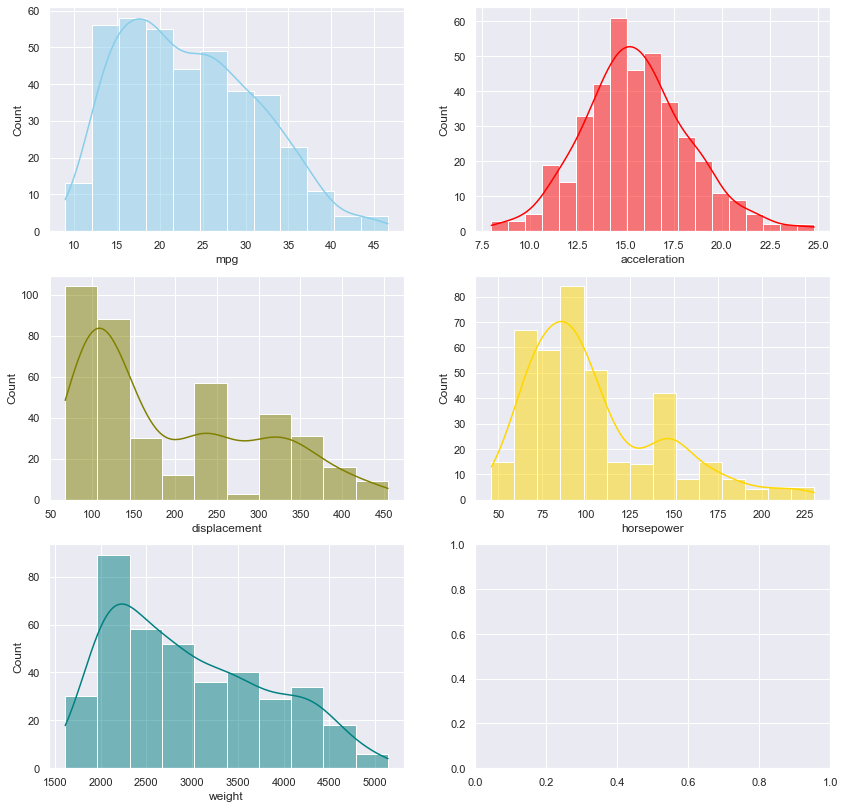

In [10]:
# distribution and skewness of data for further analysis
fig, axs = plt.subplots(3, 2, figsize=(14, 14))

sns.histplot(data=df, x="mpg", color="skyblue", kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="acceleration", color="red", kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="displacement", color="olive", kde=True, ax=axs[1, 0])
sns.histplot(data=df, x="horsepower", color="gold", kde=True, ax=axs[1, 1])
sns.histplot(data=df, x="weight", color="teal", kde=True, ax=axs[2, 0])
plt.show()

In [11]:
# target and feature seperation
y = df.iloc[:,0:1]
X = df.iloc[:,1:]

In [12]:
# scalling using L2 norm
norm_scaler = Normalizer().fit(X)
X.loc[:,:] = norm_scaler.transform(X)
X.head(3)

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,0.002272,0.087202,0.036926,0.995299,0.003409,0.019883,0.000284
1,0.002154,0.094240,0.044428,0.994372,0.003096,0.018848,0.000269
2,0.002316,0.092049,0.043419,0.994593,0.003184,0.020262,0.000289


In [13]:
# splitting data into 2/3 training set and 1/3 testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=50)

In [14]:
# model fitting
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [15]:
# prediction
y_pred_linear = model_linear.predict(X_test)

In [16]:
mean_squared_error(y_test, y_pred_linear)

7.509541105366527

In [17]:
# checking weights/theta of each feature
model_linear.coef_

array([[-2921.95396213,   -59.97523525,  -392.17357538, -1627.07954354,
        -1067.47680963,  1132.17455966,   509.93710123]])

## Let's implement liner regression with regularization.

In [18]:
from sklearn.linear_model import RidgeCV, LassoCV
#from sklearn.model_selection import cross_val_score

In [19]:
alphas = [10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 0.5]
model_RidgeCV = RidgeCV(alphas=alphas, cv=10).fit(X_train, y_train)
y_pred_RidgeCV = model_RidgeCV.predict(X_test)

In [20]:
mean_squared_error(y_test, y_pred_RidgeCV)

7.54016330504988

In [21]:
model_LassoCV = LassoCV(alphas=alphas, cv=10).fit(X_train, y_train)
y_pred_LassoCV = model_LassoCV.predict(X_test)

In [22]:
mean_squared_error(y_test, y_pred_LassoCV)

7.5140637978676965

In [23]:
# best alpha for each model
model_LassoCV.alpha_, model_RidgeCV.alpha_

(1e-05, 1e-05)

In [24]:
# Comparison of regression models and weights of the features
compare = pd.DataFrame(data = [model_RidgeCV.coef_.tolist()[0], model_LassoCV.coef_.tolist(), model_linear.coef_.tolist()[0]], 
             columns=X_test.columns, 
             index=['RidgeCV', 'LassoCV', 'OLR'])
compare['best_alpha'] = [model_RidgeCV.alpha_, model_LassoCV.alpha_, None]
compare['mean_squared_error'] = [mean_squared_error(y_test, y_pred_RidgeCV), mean_squared_error(y_test, y_pred_LassoCV), mean_squared_error(y_test, y_pred_linear)]
compare

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,best_alpha,mean_squared_error
RidgeCV,-1328.106284,-44.785126,-345.248721,-1041.002511,-991.355322,1101.180946,207.975989,0.00001,7.540163
LassoCV,-2591.741749,-53.626718,-376.485111,-1453.931703,-1036.970086,1128.985007,334.908132,0.00001,7.514064
OLR,-2921.953962,-59.975235,-392.173575,-1627.079544,-1067.476810,1132.174560,509.937101,NaN,7.509541


### <b> <u>Observation: </u></b> 

- As we can see that LassoCV reduce the overfitting far batter than RidgeCV.
- Also, LassoCV helped to reduce coefficient of attritube to zero, eventually in helps in feature selections process to improve the model over other.
- for example 'weight' attribute is not that important in prediction as it's coefficient is zero in LassoCV shown in above table. Similarly for 'cylinders' and 'origin' column.
- Similarly, if we carefully obeserv the above then get to know that as per the LassoCV 'displacement' attribute is directly dependent on mpg wheres in RidgeCV its inversly proportional to target variable.

<b>Note that L1 regularization or Lasso create sparcity in the data.</b> weights of corresponding features became zero.

Most of the columns can treat as categorical, like cylinders, model year, origin, horsepower (with feature engineering), and use other algorithms to get better accuracy.